# MNIST Project

This project leverages MNIST dataset as a pretext to study machine learning and deep learning topics.

## Setup

In [1]:
# import mnist data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import numpy as np

download = False

mnist_train = datasets.MNIST(root='./data', train=True, download=download, transform=transforms.ToTensor())
mnist_test = datasets.MNIST(
    root='./data', train=False, download=download, transform=transforms.ToTensor())

In [2]:
mnist_images = mnist_train.data
mnist_labels = mnist_train.targets

## Gaussian Estimator

Fit the distribution of the data with a gaussian vector: $q(x) = \mathcal{N}(x; \mu, \Sigma)$

Compute the parameters of the gaussian distribution using maximum likelihood estimators:

$$
\begin{align*}
\mu &= \frac{1}{N} \sum_{i=1}^{N} x_i \\
\Sigma &= \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)(x_i - \mu)^T
\end{align*}
$$

Consider two models: 
- one is a global model that fits the distribution of the whole dataset
- the other is a local model that fits the distribution of each class

In [9]:
mnist_images_flat = mnist_images.reshape(-1, 28 * 28).float()

mu_list = [mnist_images_flat[mnist_labels == i].mean(axis=0) for i in range(10)]
cov_list = [np.cov(mnist_images_flat[mnist_labels == i].T) for i in range(10)]
mu_global = mnist_images_flat.mean(axis=0)
cov_global = np.cov(mnist_images_flat.T)

### Local Model

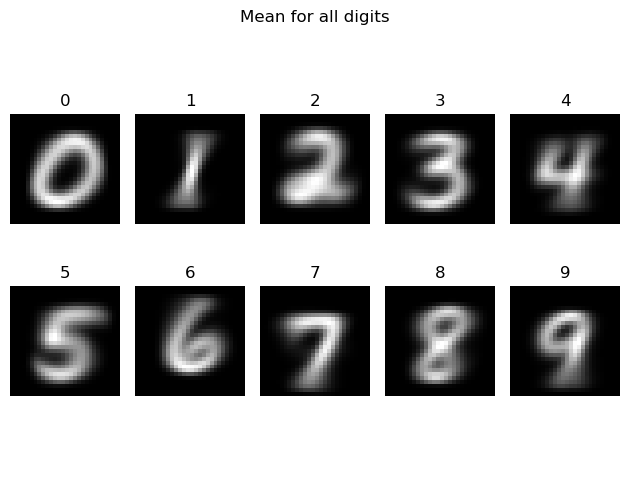

In [34]:
plt.figure()
plt.title('Mean for all digits')
plt.axis('off') 
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mu_list[i].reshape(28, 28), cmap='gray')
    plt.title(f'{i}')
    plt.axis('off')
    plt.tight_layout()

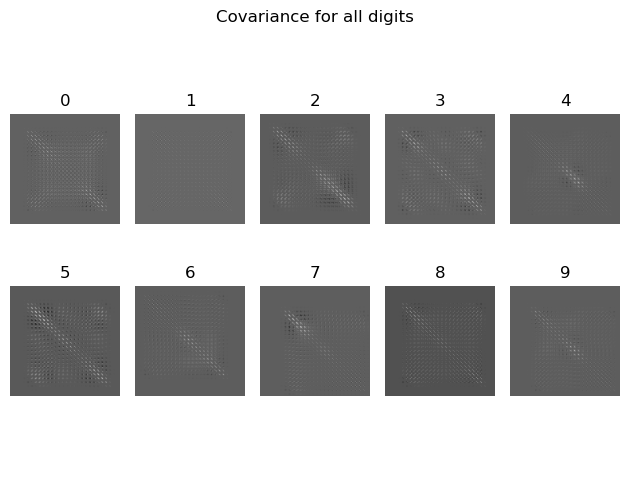

In [35]:
plt.figure()
plt.title('Covariance for all digits')
plt.axis('off')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(cov_list[i], cmap='gray')
    plt.title(f'{i}')
    plt.axis('off')
    plt.tight_layout()

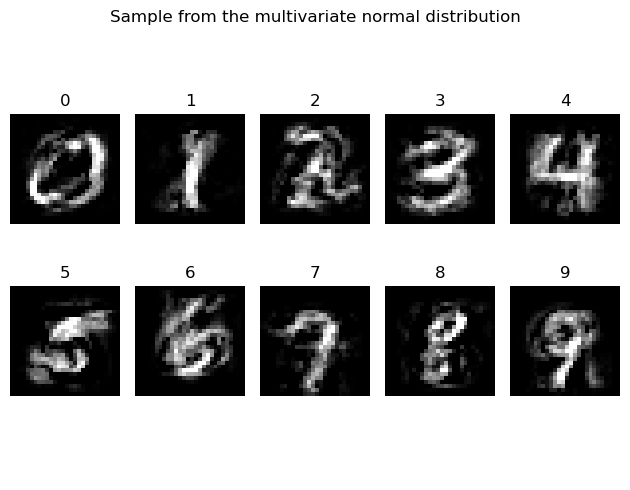

In [23]:
# sample from the multivariate normal distribution
plt.figure()
plt.title('Sample from the multivariate normal distribution')
plt.axis('off')
reg_l = 1e-3
for i in range(10):
    plt.subplot(2, 5, i+1)
    sample = multivariate_normal.rvs(mean=mu_list[i], cov=cov_list[i] + reg_l * np.eye(28 * 28))
    plt.imshow(sample.reshape(28, 28).clip(0, 255), cmap='gray')
    plt.title(f'{i}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

The samples seems blurred and the background is grey instead of pure black. This is due to the curse of dimensionality. The gaussian model capture only the mean of the pixel values which is not enough to capture the real distribution of the pixel values. The model is too simple to capture the real distribution of the pixel values.

### Global Model

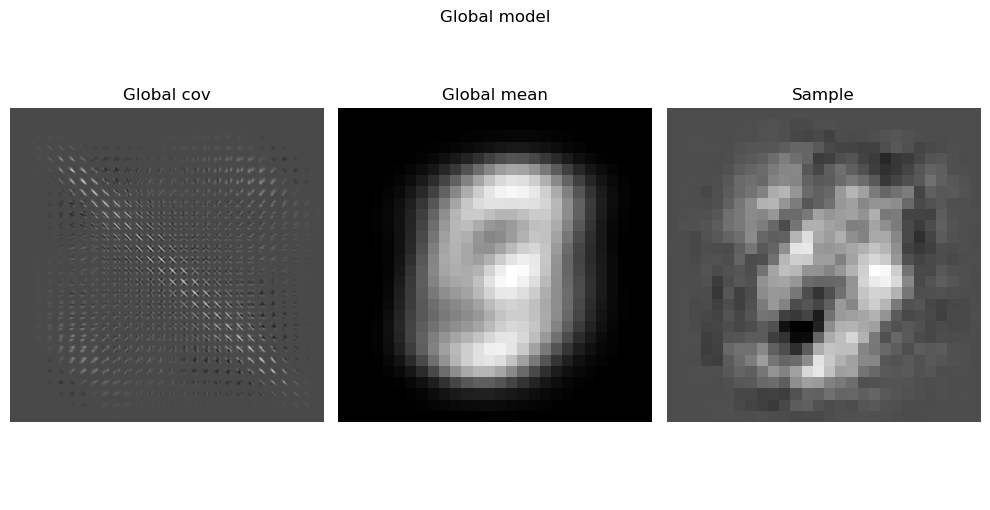

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Global model')
plt.axis('off')
plt.subplot(1, 3, 1)
plt.imshow(cov_global, cmap='gray')
plt.title('Global cov')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(mu_global.reshape(28, 28), cmap='gray')
plt.title('Global mean')    
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Sample')
plt.axis('off')
sample = multivariate_normal.rvs(mean=mu_global, cov=cov_global)
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

> Even more blurred images when we generate samples from the global distribution.